In [10]:
import onnx
from onnx_tf.backend import prepare
import tensorflow as tf
import numpy as np

In [11]:
model = onnx.load('mnist.onnx')

tf_rep = prepare(model)

In [4]:
tf_rep.export_graph('mnist')

INFO:tensorflow:Assets written to: mnist\assets


INFO:tensorflow:Assets written to: mnist\assets


Image 1:
The predicted result with ONNX is 3


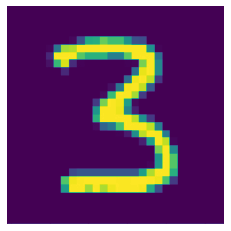

In [5]:
import matplotlib.pyplot as plt
import cv2

print('Image 1:')
img = cv2.imread('3.jpg', 0).astype(np.float32)
plt.imshow(img)
plt.axis('off')
img = cv2.resize(img, (28,28)).reshape(1, 784)

output = tf_rep.run(img)
print('The predicted result with ONNX is', np.argmax(output))

In [6]:
from onnx2keras import onnx_to_keras
import keras

In [15]:
print(tf.device("/GPU:0"))

In [16]:
onnx_model = onnx.load('./mnist.onnx')
keras_model = onnx_to_keras(onnx_model, ['input'], name_policy = 'renumerate')
keras.models.save_model(keras_model, 'mnist.h5', overwrite=True, include_optimizer=True)

In [8]:
keras_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
LAYER_0 (Dense)              (None, 128)               100480    
_________________________________________________________________
LAYER_1 (Activation)         (None, 128)               0         
_________________________________________________________________
LAYER_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
out = keras_model.predict(img)
print('The predicted result with KERAS is', np.argmax(out))

The predicted result with KERAS is 3
